In [1]:
# !pip install pyparsing==2.4.6
# !pip install tensorflow

In [2]:
import sys
sys.path.append("../utils/") 
from utilities import performance_metrics
import time

from src.core import Term, Atom
from src.ilp import Language_Frame, Program_Template, Rule_Template
from src.dilp import DILP
import tensorflow as tf
import numpy as np
from src.utils import process_file, process_dir, create_table, output_rules, test_rule, train, test
from src.generate_template import create_templates
import duckdb
tf.random.set_seed(1000)
np.random.seed(1000)

2024-05-17 18:49:28.539010: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-17 18:49:29.393261: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
# arity 1
term_x_0 = Term(True, 'X_0')

In [4]:
con = duckdb.connect(':memory:')
# enable automatic query parallelization
con.execute("PRAGMA threads=2")
# enable caching of parquet metadata
con.execute("PRAGMA enable_object_cache")


## short rules

In [5]:
%%time 
input_dir = '../examples/fraud-cart-short/'
target, p_e, constants, B, P, N = process_dir(input_dir)
language_frame = Language_Frame(target, p_e, constants)
input_table = create_table(con, input_dir, 'df_test')


776
end of facts processing
100
end of positive examples processing
100
end negative examples processing
data is in order
CPU times: user 341 ms, sys: 20 ms, total: 361 ms
Wall time: 355 ms


Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 0 loss is 4.518270492553711
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
isFraud(79) Expected: 0 0.995
isFraud(33) Expected: 0 1.000
isFraud(22) Expected: 0 0.995
isFraud(129) Expected: 1 0.998
isFraud(80) Expected: 0 0.995
isFraud(113) Expected: 1 1.000
isFraud(69) Expected: 0 1.000
isFraud(71) Expected: 0 0.928
isFraud(44) Expected: 0 0.928
isFraud(47) Expected: 0 0.995
isFraud(180) Expected: 1 0.870
isFraud(133) Expected: 1 1.000
isFraud(149) Expected: 1 1.000
isFraud(156) Expected: 1 1.000
isFraud(27) Expected: 0 0.715
isFraud(151) Expected: 1 1.000
isFraud(189) Expected: 1 0.984
isFraud(143) Expected: 1 1.000
isFraud(20) Expected: 0 0.998
isFraud(46

'select "{external_dest, 0.5}" and "{type_TRANSFER, 0.5}" as "pred1",\n "pred1" and "{oldbalanceDest, -0.0067258847411721945}" as "isFraud",\n'

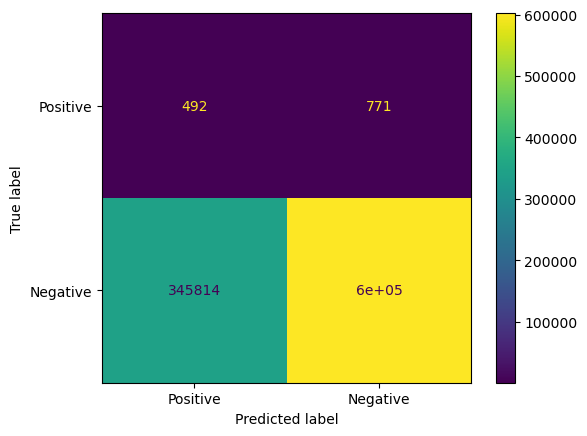

In [6]:
T=5
p_a, rules = create_templates(p_e[0:3], target, term_x_0)
program_template = Program_Template(p_a, rules, T=T)
dilp = DILP(language_frame, B, P, N, program_template, allow_target_recursion=True)
train(dilp)
test(dilp, input_table, con)

## all possible predicates, without target recursion

In [ ]:
T=5
p_a, rules = create_templates(p_e, target, term_x_0)
program_template = Program_Template(p_a, rules, T=T)
dilp = DILP(language_frame, B, P, N, program_template, allow_target_recursion=False)
train(dilp)
test(dilp, input_table, con)

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 0 loss is 1.9957404136657715
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
isFraud(79) Expected: 0 0.871
isFraud(33) Expected: 0 0.999
isFraud(22) Expected: 0 0.871
isFraud(129) Expected: 1 0.912
isFraud(80) Expected: 0 0.871
isFraud(113) Expected: 1 0.975
isFraud(69) Expected: 0 0.999
isFraud(71) Expected: 0 0.960
isFraud(44) Expected: 0 0.960
isFraud(47) Expected: 0 0.871
isFraud(180) Expected: 1 0.520
isFraud(133) Expected: 1 0.999
isFraud(149) Expected: 1 0.999
isFraud(156) Expected: 1 0.999
isFraud(27) Expected: 0 0.649
isFraud(151) Expected: 1 0.999
isFraud(189) Expected: 1 0.566
isFraud(143) Expected: 1 0.999
isFraud(20) Expected: 0 0.912
isFraud(4

## all possible predicates, without target recursion